# Machine Learning: Assignment 4
## Regression methods (max. 10p)

In [2]:
# Write Your information in here
student_name = 'Juuso Leppänen'
student_email = "ad1885@student.jamk.fi"

## Assignment 4.1: Preprocess the data (2 p)
### Topic: Productivity of textile workers

1. Explore and download the data from [https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). Load the data into the DataFrame.

2. Remove background variables from the analyzed data.

3. Decide what to do with the missing values.

4. Normalize the data.

5. Additionally, create a new class variable with a value of 0 if the productivity is less than 0.5 and with a value of 1 if the productivity is above 0.5. Store this in the df variable as column `class`. That will be used in classification assignment (4.3).

In [4]:
# TODO: Write your code in this cell.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "garments_worker_productivity.csv"
df = pd.read_csv(file_path)

# Drop background variables
df = df.drop(columns=["date", "quarter", "department", "day"])

# Handle missing values (fill with mean)
df = df.fillna(df.mean(numeric_only=True))

# Normalize numeric data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.drop(columns=["actual_productivity"]))
df_scaled = pd.DataFrame(scaled, columns=df.drop(columns=["actual_productivity"]).columns)

# Add target columns back
df_scaled["actual_productivity"] = df["actual_productivity"]

# Add new class column
df_scaled["class"] = (df_scaled["actual_productivity"] >= 0.5).astype(int)

df = df_scaled

In [5]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'class'],
      dtype='object')
First row by position: team                     0.636364
targeted_productivity    1.000000
smv                      0.450252
wip                      0.047631
over_time                0.273148
incentive                0.027222
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.655172
actual_productivity      0.940725
class                    1.000000
Name: 0, dtype: float64


## Assignment 4.2: Regression using a Linear Regression model (2 p)

1. Split the data into training (67%) and testing data (33%), also saving the class variables as their own vectors (`X_train`, `y_train`, `X_test`, `y_test`). Use random seed `2150`.

Tip: don't put the columns `actual_productivity` or `class` in the input variables (features).

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a regression model using a linear regressor. So you try to predict the `actual_productivity` variable.

Use random seed `2100`.

3. Predict the `actual_productivity` of the test dataset. Record the explained variance `exp_var` and
the maximum error `max_err` using the tools in the `metrics` module of the library.

In [7]:
# TODO: Write your code in this cell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error
import numpy as np

# Features and target
X = df.drop(columns=['actual_productivity', 'class'])
y = df['actual_productivity']

# Split data: 67% train / 33% test, random seed 2150
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2150
)

In [8]:
# TODO: Create and test Linear regression model
np.random.seed(2100)
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Metrics
exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# Weighted explained variance (by team size)
weights = X_test['no_of_workers']
exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)

linr_exp_var = explained_variance_score(y_test, y_pred)
linr_exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)
linr_max_err = max_error(y_test, y_pred)

In [9]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(f'Train columns: {X_train.columns}')
print(f'Train columns length: {len(X_train.columns)}')
print(f'Predict 5 items: {y_pred[:5]} ... {y_pred[-5:]}')

# exp_var = max_err = exp_var_2 = None

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')
print(f'Explained variance (Weighted): {exp_var_2}')

Test length: 396
Train length: 801
Train columns: Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')
Train columns length: 10
Predict 5 items: [0.764746   0.82895628 0.78652334 0.64939604 0.66949758] ... [0.73994682 0.73194406 0.76994661 0.70030028 0.82636506]
Explained variance: 0.2519799563813252
Maximum error: 0.5307453818853052
Explained variance (Weighted): 0.45596871738216005


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [11]:
# TODO: Explained variance

weights = X_test['no_of_workers']  # weight by team size
exp_var_weighted = explained_variance_score(y_test, y_pred, sample_weight=weights)

print(f'Explained variance: {exp_var}')
print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance: 0.2519799563813252
Explained variance (Weighted): 0.45596871738216005
Explained variance (Weighted): 0.45596871738216005


## Assignment 4.3: Classification using Random Forest (2 p)

1. Create training and testing data. Use random seed `2150`. Note that the `class` variable is now predicted.

2. Use the [functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) from `ensemble` module
of the `scikit-learn` library and create a classification model using a random forest. Use random seed `2100`. So let's try to predict the class variable `class`.

3. Predict `class` from the test data. Generate the accuracy report `cr` and the confusion matrix `cm` using the tools in the `metrics` module of the library.

In [13]:
# TODO: Write your code in this cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_test = X_train = cr = cm = None

# Features and target
X = df.drop(columns=['actual_productivity', 'class'])
y = df['class']

# Split data: 67% train / 33% test, random seed 2150
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2150
)

# Random Forest Classifier, random seed 2100
rf_model = RandomForestClassifier(n_estimators=100, random_state=2100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Feature importances
feature_importances = rf_model.feature_importances_

In [14]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The results are in cm and cr variables.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(cr)
print(cm)

Test length: 396
Train length: 801
              precision    recall  f1-score   support

           0       0.63      0.35      0.45        49
           1       0.91      0.97      0.94       347

    accuracy                           0.89       396
   macro avg       0.77      0.66      0.69       396
weighted avg       0.88      0.89      0.88       396

[[ 17  32]
 [ 10 337]]


Show the importance of the features when using the **Random Forest Classifier** method.

In [16]:
# TODO: the importance of features
for i, importance in enumerate(feature_importances):
    print(f'Feature: {X.columns[i]:20s} - Importance: {importance:.4f}')

Feature: team                 - Importance: 0.1361
Feature: targeted_productivity - Importance: 0.1585
Feature: smv                  - Importance: 0.1643
Feature: wip                  - Importance: 0.0936
Feature: over_time            - Importance: 0.1800
Feature: incentive            - Importance: 0.0916
Feature: idle_time            - Importance: 0.0130
Feature: idle_men             - Importance: 0.0142
Feature: no_of_style_change   - Importance: 0.0146
Feature: no_of_workers        - Importance: 0.1341


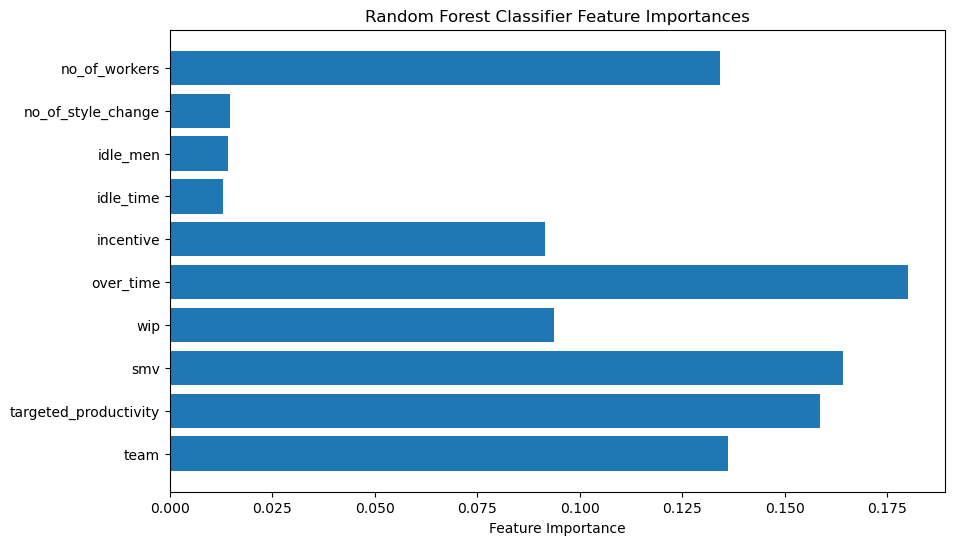

In [17]:
# TODO: Visualize the importance of features
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Classifier Feature Importances")
plt.show()

## Assignment 4.4: Regression using Random Forest Regressor (2 p)

Repeat same than **assignment 4.2** but now using a **Random Forest Regression** method.

Also calculate the *explained variance* and *maximum error*.

In [19]:
# TODO: Write your code in this cell
# TODO: use Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, max_error

# Initialize variables
X_test = X_train = exp_var = max_err = None

# Features and target
X = df.drop(columns=['actual_productivity', 'class'])
y = df['actual_productivity']

# Split data: 67% train / 33% test, random seed 2150
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2150
)

# Random Forest Regressor, random seed 2100
rf_reg = RandomForestRegressor(n_estimators=100, random_state=2100)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Metrics
exp_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# Weighted explained variance by team size
weights = X_test['no_of_workers']
exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)

rf_exp_var = explained_variance_score(y_test, y_pred)
rf_exp_var_2 = explained_variance_score(y_test, y_pred, sample_weight=weights)
rf_max_err = max_error(y_test, y_pred)

In [20]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save responses in exp_var and max_err and exp_var_2 variables.

print(f'Explained variance: {exp_var}')
print(f'Maximum error: {max_err}')

Explained variance: 0.38962763281025925
Maximum error: 0.6274854660996855


**Explained variance** refers to the variance in the response variable in a model that can be explained by the predictor variable(s) in the model.
The higher the explained variance of a model, the more the model is able to explain the variation in the data.

Calculate and analyze the explained variance for the assignment.

In [22]:
# TODO: Explained variance

print(f'Explained variance: {exp_var}')
print(f'Explained variance (Weighted): {exp_var_2}')
print(f'Explained variance (Weighted): {exp_var_weighted}')

Explained variance: 0.38962763281025925
Explained variance (Weighted): 0.6820914524704345
Explained variance (Weighted): 0.45596871738216005


Show the **importance of the features** when using **Random Forest Regressor** method.

In [24]:
# TODO: the importance of features with Random Forest Regressor
feature_importances = rf_reg.feature_importances_

for i, importance in enumerate(feature_importances):
    print(f'Feature: {X.columns[i]:20s} - Importance: {importance:.4f}')

Feature: team                 - Importance: 0.1146
Feature: targeted_productivity - Importance: 0.2678
Feature: smv                  - Importance: 0.1703
Feature: wip                  - Importance: 0.0280
Feature: over_time            - Importance: 0.1260
Feature: incentive            - Importance: 0.1372
Feature: idle_time            - Importance: 0.0057
Feature: idle_men             - Importance: 0.0035
Feature: no_of_style_change   - Importance: 0.0043
Feature: no_of_workers        - Importance: 0.1425


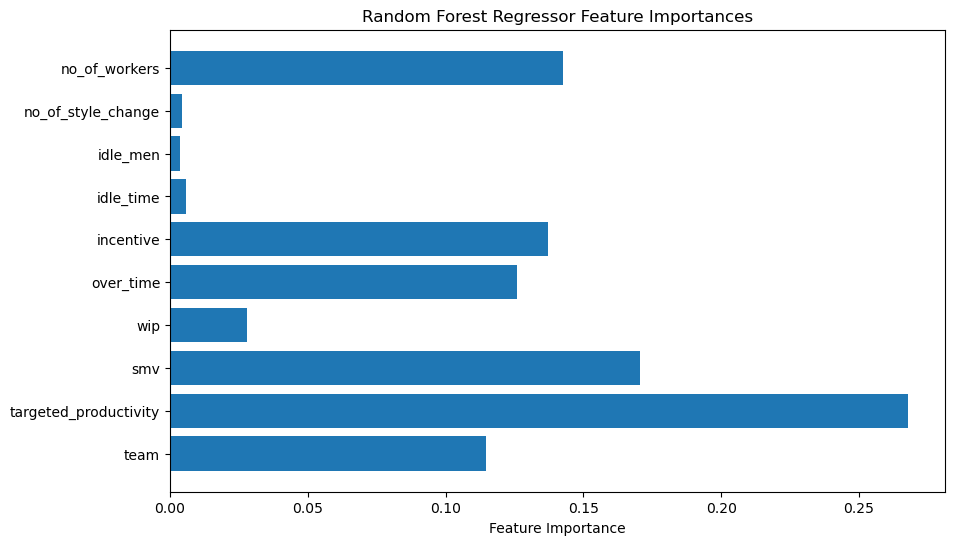

In [25]:
# TODO: Visualize the importance of features
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Regressor Feature Importances")
plt.show()

## Assignment 4.5: Analysis of results (2 p)

Let's do a result analysis where you verbally compare the regression results obtained in the assignments 4.2 and 4.4.
* **4.2** (Linear regression) and
* **4.4** (Random Forest regression).

You can use **tables** or **figures** to present results in addition to verbal explanation and analysis.

Comparison of Different Regression Models:

* Compare the regression results of Random Forest and Linear Regression models.
* Is there others good regression methods to apply with this dataset?

<font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>



# Linear Regression (4.2) PROS/CONS
Explained Variance (EV): 0.252 → captures ~25% of productivity variance; struggles with complex, non-linear relationships.
Max Error: 0.531 → worst prediction off by ~0.53 units.
Weighted EV: 0.456 → predicts larger teams somewhat better, reflecting their higher business impact.

# Random Forest Regressor (4.4) PROS/CONS
Explained Variance (EV): 0.390 → captures ~39% of variance; handles non-linear relationships and feature interactions better.
Max Error: 0.628 → slightly higher worst-case error, but overall predictions are more accurate.
Weighted EV: 0.682 → much better at predicting productivity for larger teams, increasing weighted score.

# Interpretation:
Random Forest captures more variance and handles larger teams better.
Linear regression underperforms due to non-linearities and interactions in the data.
Max error alone doesn’t reflect overall model quality; Random Forest may have slightly larger single errors but provides better predictions overall.

# Support Vector Regression (SVR) Works well for smaller datasets. Larger datasets benefit from neural networks like MLPRegressor.

# I had a really tough time figuring out what weighting means and I think I understood but not sure but learning everything has been pleasent so far

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, max_error

# --- Assignment 4.2 model (Linear Regression) ---
linr_reg = LinearRegression()
linr_reg.fit(X_train, y_train)
y_pred_linr = linr_reg.predict(X_test)

exp_var_linr = explained_variance_score(y_test, y_pred_linr)
max_err_linr = max_error(y_test, y_pred_linr)
exp_var_linr_weighted = explained_variance_score(y_test, y_pred_linr, sample_weight=X_test['no_of_workers'])

# --- Assignment 4.4 model (Random Forest Regressor) ---
rf_reg = RandomForestRegressor(random_state=2100, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

exp_var = explained_variance_score(y_test, y_pred_rf)
max_err = max_error(y_test, y_pred_rf)
exp_var_2 = explained_variance_score(y_test, y_pred_rf, sample_weight=X_test['no_of_workers'])

print("=== Linear Regression (4.2) ===")
print(f"Explained variance: {exp_var_linr:.4f}")
print(f"Maximum error: {max_err_linr:.4f}")
print(f"Explained variance (Weighted): {exp_var_linr_weighted:.4f}")

print("\n=== Random Forest Regressor (4.4) ===")
print(f"Explained variance: {exp_var:.4f}")
print(f"Maximum error: {max_err:.4f}")
print(f"Explained variance (Weighted): {exp_var_2:.4f}")

=== Linear Regression (4.2) ===
Explained variance: 0.2520
Maximum error: 0.5307
Explained variance (Weighted): 0.4560

=== Random Forest Regressor (4.4) ===
Explained variance: 0.3896
Maximum error: 0.6275
Explained variance (Weighted): 0.6821


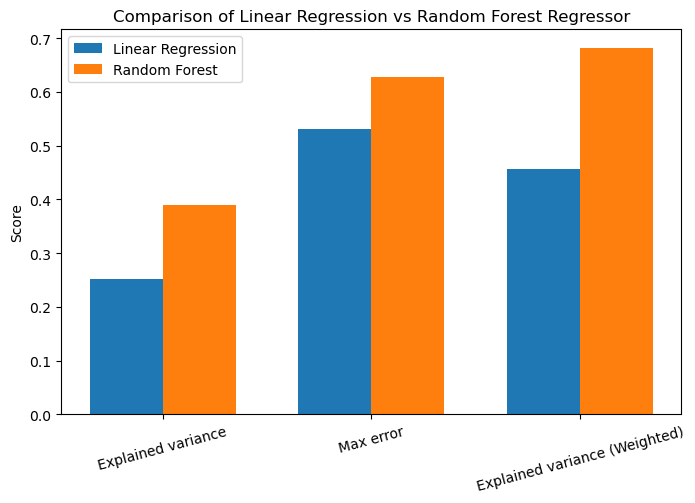

In [28]:
import matplotlib.pyplot as plt

# Metrics for comparison
metrics = ["Explained variance", "Max error", "Explained variance (Weighted)"]
linr_scores = [exp_var_linr, max_err_linr, exp_var_linr_weighted]
rf_scores = [exp_var, max_err, exp_var_2]

x = range(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], linr_scores, width=width, label="Linear Regression")
plt.bar([i + width/2 for i in x], rf_scores, width=width, label="Random Forest")

plt.xticks(x, metrics, rotation=15)
plt.ylabel("Score")
plt.title("Comparison of Linear Regression vs Random Forest Regressor")
plt.legend()
plt.show()

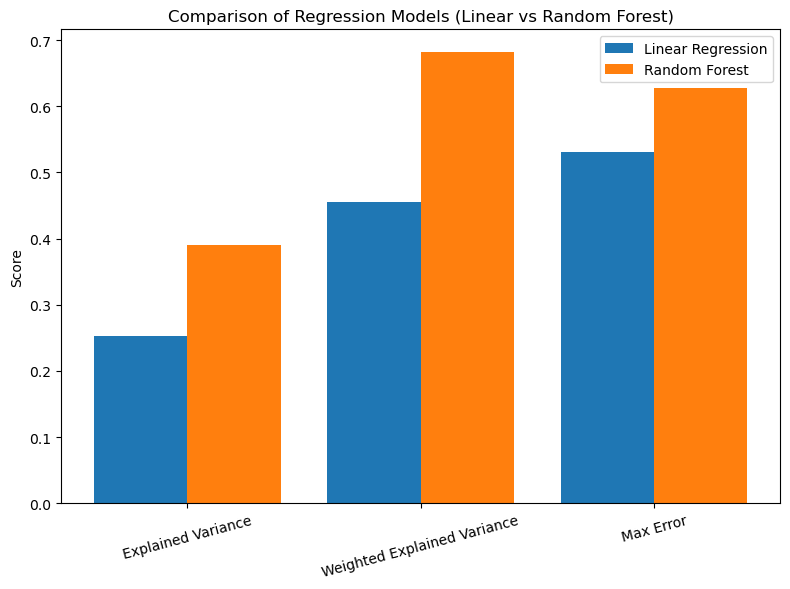

In [29]:
# TODO: Visualize comparison of regression models
import matplotlib.pyplot as plt

metrics = ["Explained Variance", "Weighted Explained Variance", "Max Error"]

# Values in the same order as metrics
linr_values = [linr_exp_var, linr_exp_var_2, linr_max_err]
rf_values   = [rf_exp_var, rf_exp_var_2, rf_max_err]

x = range(len(metrics))  # 0, 1, 2

plt.figure(figsize=(8,6))
plt.bar([i - 0.2 for i in x], linr_values, width=0.4, label="Linear Regression")
plt.bar([i + 0.2 for i in x], rf_values, width=0.4, label="Random Forest")

plt.xticks(x, metrics, rotation=15)
plt.ylabel("Score")
plt.title("Comparison of Regression Models (Linear vs Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()
